### Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
### Data Preparation

Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

### Demographic:
• male: 1 means male and 0 means female(categorical)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
### Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
### Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
### Medical(current)
• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)
### Response variable ( target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

## Importing Python Packages

In [1]:
#importing the necessary libraries
#import pandas as pd
import pandas as pd
#import numpy as np
import numpy as np
#import matplotlib as plt for visualisation
import matplotlib.pyplot as plt
#import seabon as sns for visualisation
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Preparation

In [3]:
#loading the heart disease data set
heart=pd.read_csv('C:/Users/anura/Downloads/heart-disease-prediction-using-logistic-regression/framingham.csv')
#Inspecting the first 5 rows
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#checking the dimensions as it have 4238 rows and 16 columns
dim=heart.shape
#Number of rows
dim[0]

4238

In [5]:
#summary of the heart disease dataset
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
male,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.000,1.0
age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.000,70.0
education,4133.0,1.978950,1.019791,1.00,1.00,2.0,3.000,4.0
currentSmoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.000,1.0
cigsPerDay,4209.0,9.003089,11.920094,0.00,0.00,0.0,20.000,70.0
BPMeds,4185.0,0.029630,0.169584,0.00,0.00,0.0,0.000,1.0
prevalentStroke,4238.0,0.005899,0.076587,0.00,0.00,0.0,0.000,1.0
prevalentHyp,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.000,1.0
diabetes,4238.0,0.025720,0.158316,0.00,0.00,0.0,0.000,1.0
totChol,4188.0,236.721585,44.590334,107.00,206.00,234.0,263.000,696.0


In [6]:
# print a concise summary of a heat disease dataframe
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
male               4238 non-null int64
age                4238 non-null int64
education          4133 non-null float64
currentSmoker      4238 non-null int64
cigsPerDay         4209 non-null float64
BPMeds             4185 non-null float64
prevalentStroke    4238 non-null int64
prevalentHyp       4238 non-null int64
diabetes           4238 non-null int64
totChol            4188 non-null float64
sysBP              4238 non-null float64
diaBP              4238 non-null float64
BMI                4219 non-null float64
heartRate          4237 non-null float64
glucose            3850 non-null float64
TenYearCHD         4238 non-null int64
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## Handing Missing Values

In [7]:
#Checking the number of missing value in each columns
NaN=heart.isna().sum()
NaN

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
#Percentage of NAN values in each columns
PercentageNAN=(heart.isna().sum()/dim[0])*100
PercentageNAN

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64

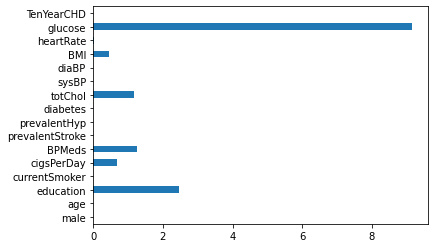

In [9]:
#Plotting percentage of nan graph
PercentageNAN.plot(kind='barh')

In [10]:
#Filling the missing value with foreward and backward fill because there are categorical value also .
#Foreward and Backward fill filled the missing values with upper and lower rows.
#We are not taking the mean as their is categorical values which we  can't take the mean
# Forward and Backward fill is used to fill the null values so the distribution is not affected
heart.fillna(method='ffill',inplace=True)
heart.fillna(method='bfill',inplace=True)

## Data Understanding

In [11]:
#All columns in the dataset
for colname in heart:
    print(colname)

male
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


In [12]:
#Education level and their counts
heart['education'].value_counts()

1.0    1761
2.0    1283
3.0     708
4.0     486
Name: education, dtype: int64

In [13]:
#ideal BMI
idealBMI=heart[(heart['BMI']>18.5) & (heart['BMI']<25)]
idealBMI

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0
10,0,50,1.0,0,0.0,0.0,0,0,0,254.0,133.0,76.0,22.91,75.0,76.0,0
14,0,39,2.0,1,9.0,0.0,0,0,0,226.0,114.0,64.0,22.35,85.0,84.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,86.0,0


In [14]:
#Ideal BMI count of TenYearCHD
idealBMI['TenYearCHD'].value_counts()

0    1649
1     234
Name: TenYearCHD, dtype: int64

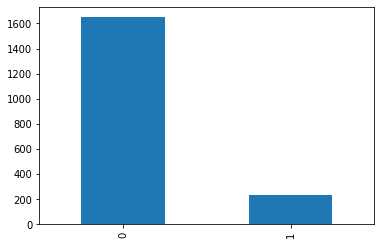

In [15]:
#graph
idealBMI['TenYearCHD'].value_counts().plot('bar')

In [16]:
#Percentage of People having ideal BMI
idealBMIPercentage=(idealBMI.shape[0]/heart.shape[0])*100
idealBMIPercentage

44.43133553563001

In [17]:
#correaltion between different features
heart.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.018581,0.197596,0.318391,-0.049736,-0.004546,0.005313,0.015708,-0.070290,-0.035989,0.057933,0.083003,-0.116816,-0.000703,0.088428
age,-0.028979,1.000000,-0.161294,-0.213748,-0.191004,0.121529,0.057655,0.307194,0.101258,0.260363,0.394302,0.206104,0.134657,-0.013144,0.117662,0.225256
education,0.018581,-0.161294,1.000000,0.016201,0.007237,-0.007670,-0.034798,-0.077397,-0.033482,-0.023893,-0.125390,-0.057834,-0.130552,-0.051103,-0.028511,-0.053274
currentSmoker,0.197596,-0.213748,0.016201,1.000000,0.764769,-0.046759,-0.032988,-0.103260,-0.044295,-0.044075,-0.130230,-0.107746,-0.165064,0.062147,-0.049400,0.019456
cigsPerDay,0.318391,-0.191004,0.007237,0.764769,1.000000,-0.044195,-0.032650,-0.068243,-0.037083,-0.025556,-0.090534,-0.059622,-0.091771,0.072137,-0.054599,0.057717
BPMeds,-0.049736,0.121529,-0.007670,-0.046759,-0.044195,1.000000,0.114056,0.256755,0.050968,0.074907,0.250376,0.190098,0.097851,0.015011,0.049342,0.085491
prevalentStroke,-0.004546,0.057655,-0.034798,-0.032988,-0.032650,0.114056,1.000000,0.074830,0.006949,0.000028,0.057009,0.045190,0.025859,-0.017659,0.015662,0.061810
prevalentHyp,0.005313,0.307194,-0.077397,-0.103260,-0.068243,0.256755,0.074830,1.000000,0.077808,0.163263,0.696755,0.615751,0.299609,0.146922,0.080792,0.177603
diabetes,0.015708,0.101258,-0.033482,-0.044295,-0.037083,0.050968,0.006949,0.077808,1.000000,0.038172,0.111283,0.050329,0.083929,0.049021,0.577798,0.097317
totChol,-0.070290,0.260363,-0.023893,-0.044075,-0.025556,0.074907,0.000028,0.163263,0.038172,1.000000,0.207155,0.164570,0.114416,0.090791,0.048637,0.080645


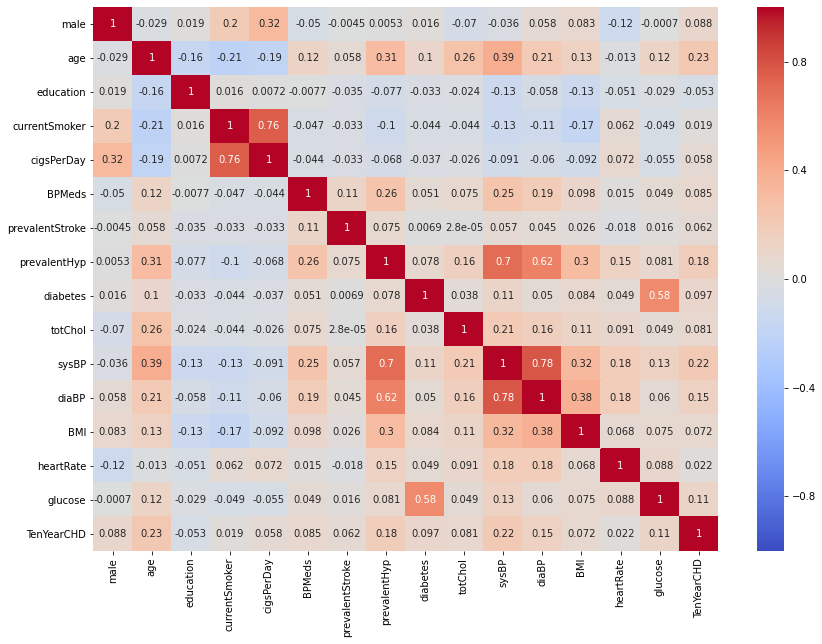

In [18]:
# checking which features are correlated with each other and are correlated with the outcome variable
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(heart.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

In [19]:
#target or response variable
heart.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

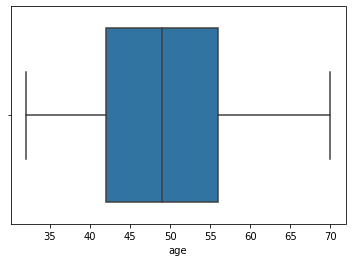

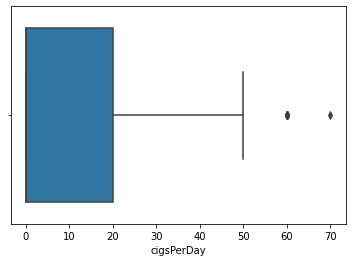

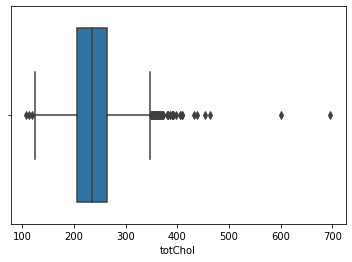

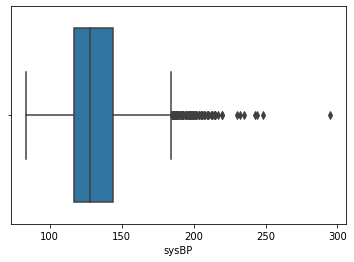

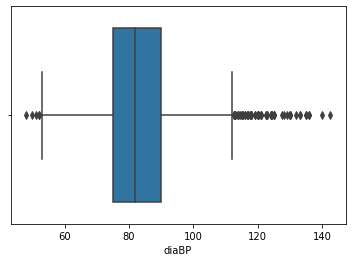

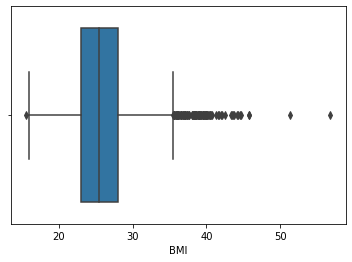

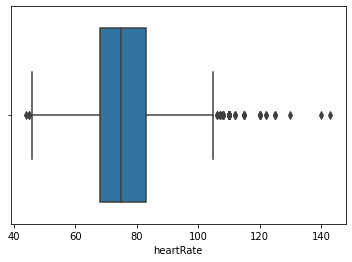

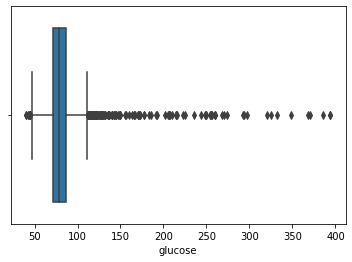

In [20]:
# Checking for outliers in the quantitative column of heart data set

cols=["age","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]

for col in cols:
    sns.boxplot(heart[col])
    plt.show()

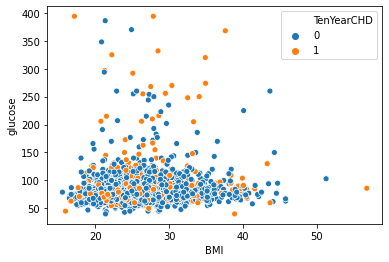

In [21]:
#scatter plot with x-axis as BMI and y-axis as  glucose with hue as TenYearCHD
sns.scatterplot(heart["BMI"],heart["glucose"],hue=heart["TenYearCHD"])

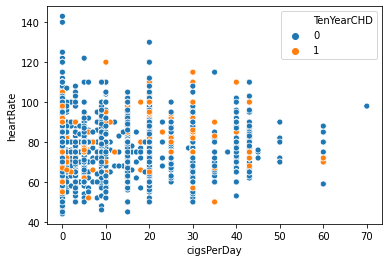

In [22]:
#scatter plot with x-axis as cigsPerDay and y-axis as  heartRate with hue as TenYearCHD
sns.scatterplot(heart['cigsPerDay'],heart["heartRate"],hue=heart["TenYearCHD"])

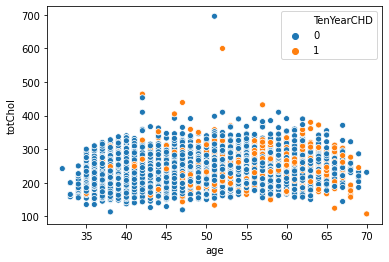

In [23]:
#scatter plot with x-axis as age and y-axis as  totChol with hue as TenYearCHD
sns.scatterplot(heart['age'],heart["totChol"],hue=heart["TenYearCHD"])

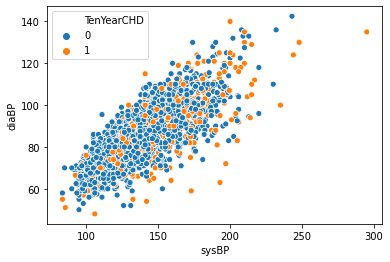

In [24]:
#scatter plot with x-axis as sysBP and y-axis as  diaBP with hue as TenYearCHD
sns.scatterplot(heart['sysBP'],heart["diaBP"],hue=heart["TenYearCHD"])

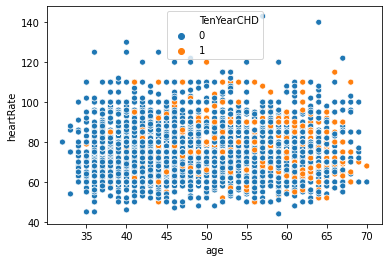

In [25]:
#scatter plot with x-axis as age and y-axis as  heartRate with hue as TenYearCHD
sns.scatterplot(heart['age'],heart["heartRate"],hue=heart["TenYearCHD"])

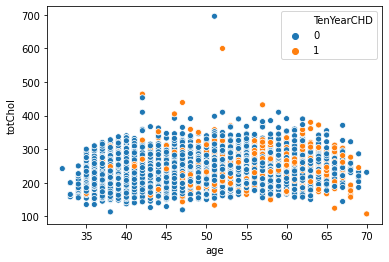

In [26]:
#scatter plot with x-axis as age and y-axis as  totChol with hue as TenYearCHD
sns.scatterplot(heart['age'],heart["totChol"],hue=heart["TenYearCHD"])

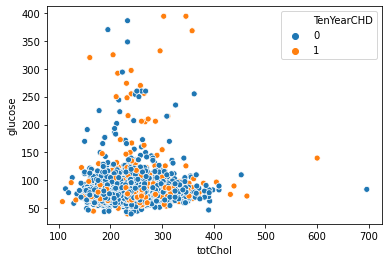

In [27]:
#scatter plot with x-axis as totChol and y-axis as  glucose with hue as TenYearCHD
sns.scatterplot(heart['totChol'],heart["glucose"],hue=heart["TenYearCHD"])

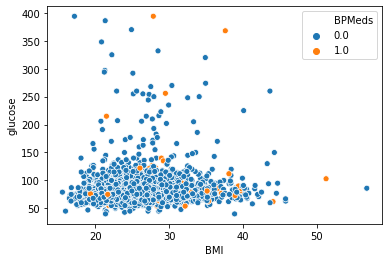

In [28]:
#scatter plot with x-axis as BMI and y-axis as glucose with hue as BPMeds
sns.scatterplot(heart["BMI"],heart["glucose"],hue=heart['BPMeds'])

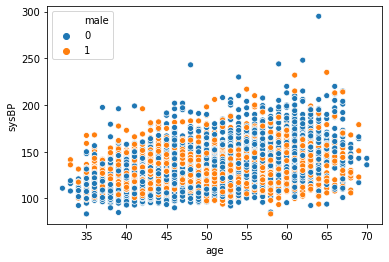

In [29]:
sns.scatterplot(heart["age"],heart["sysBP"],hue=heart['male'])

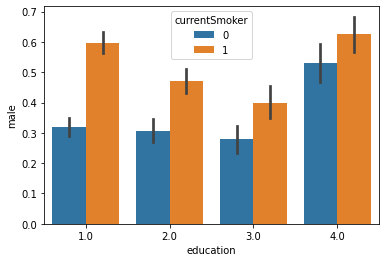

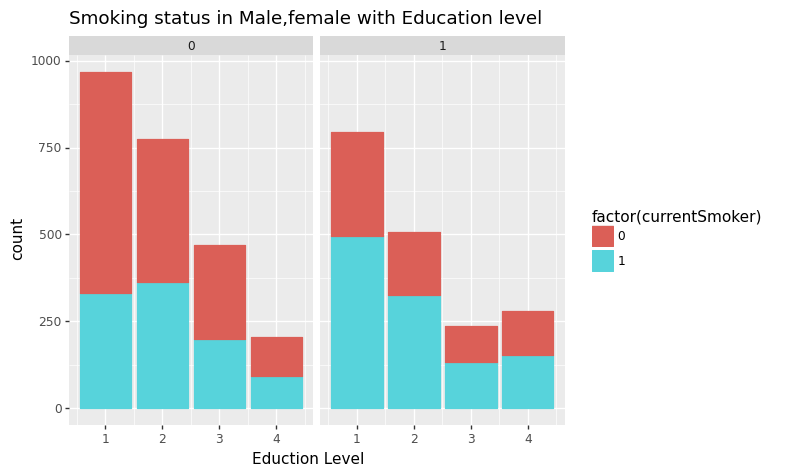

<ggplot: (-9223371885178181912)>

In [30]:
#Smoking habits with education level and gender
sns.barplot(x='education',y='male',data=heart, hue='currentSmoker')
#from plotnine import all
#conda install -c conda-forge plotnine 
from plotnine import *
ggplot(data=heart)+geom_bar(aes('education',fill = 'factor(currentSmoker)',color='factor(currentSmoker)'))+labs( title = "Smoking status in Male,female with Education level ",x = "Eduction Level", y ='count')+facet_wrap('~male')

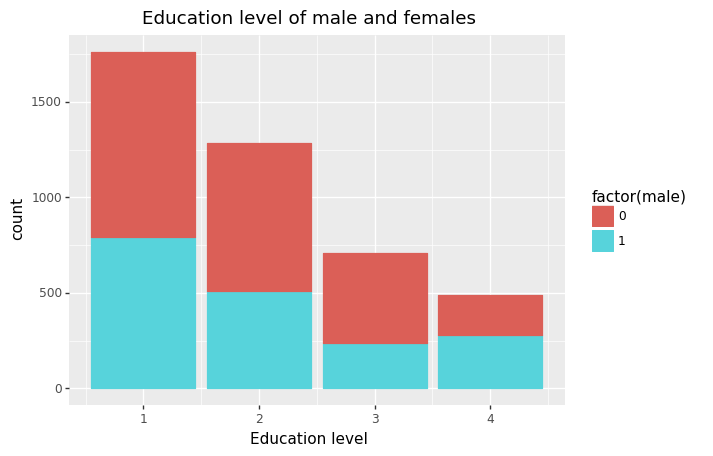

<ggplot: (-9223371885178103208)>

In [31]:
#Education level of male and female
ggplot(data=heart)+geom_bar(aes('education',fill = 'factor(male)',color='factor(male)'))+labs( title = "Education level of male and females",x = "Education level", y ='count')

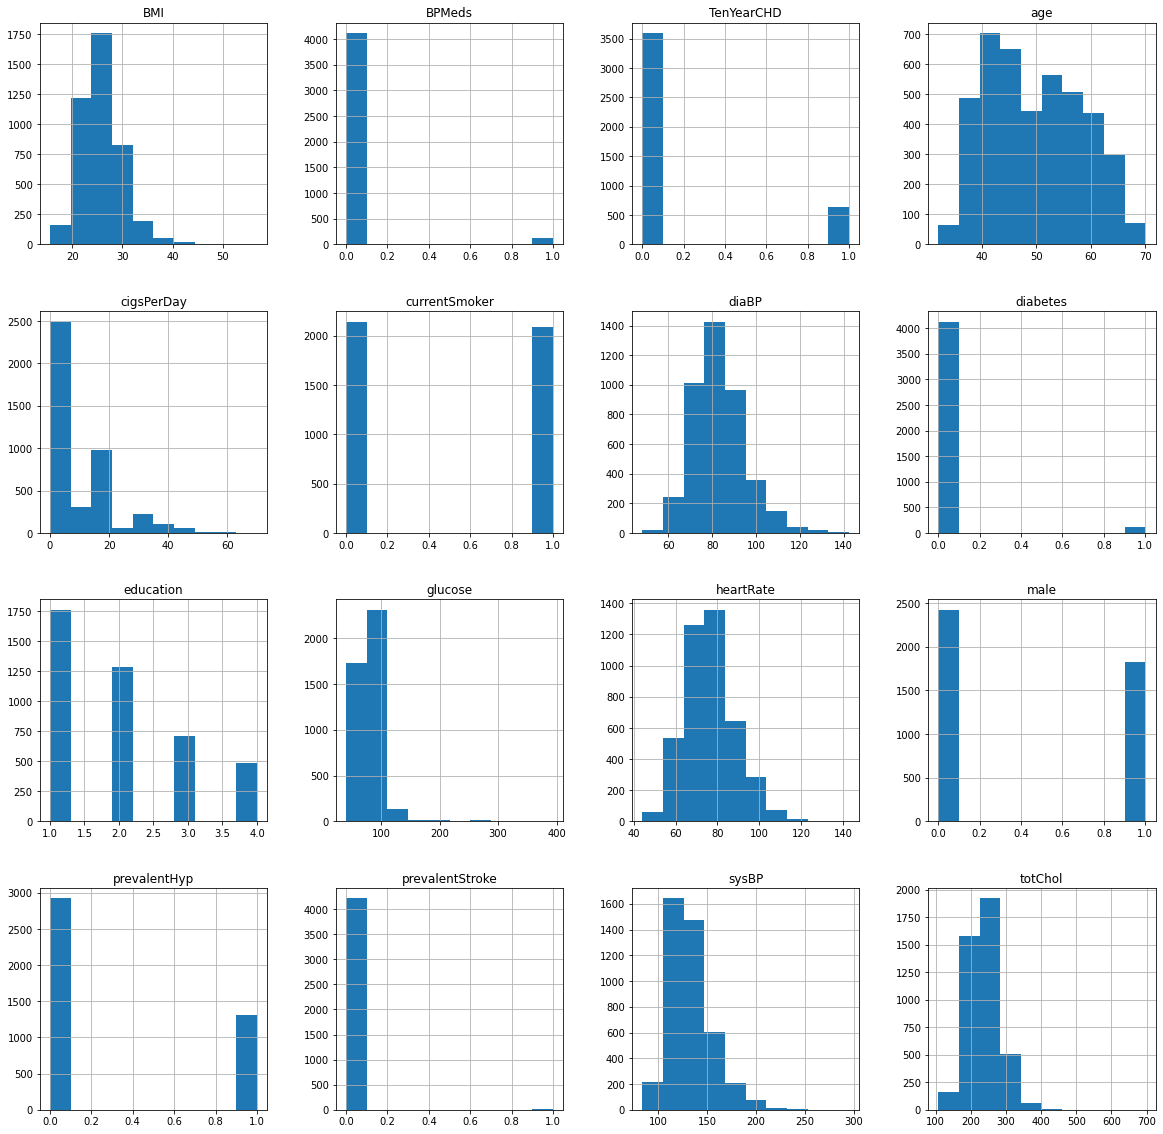

In [32]:
#Histogram of the heart dataset
heart.hist(figsize=(20, 20))
plt.show()

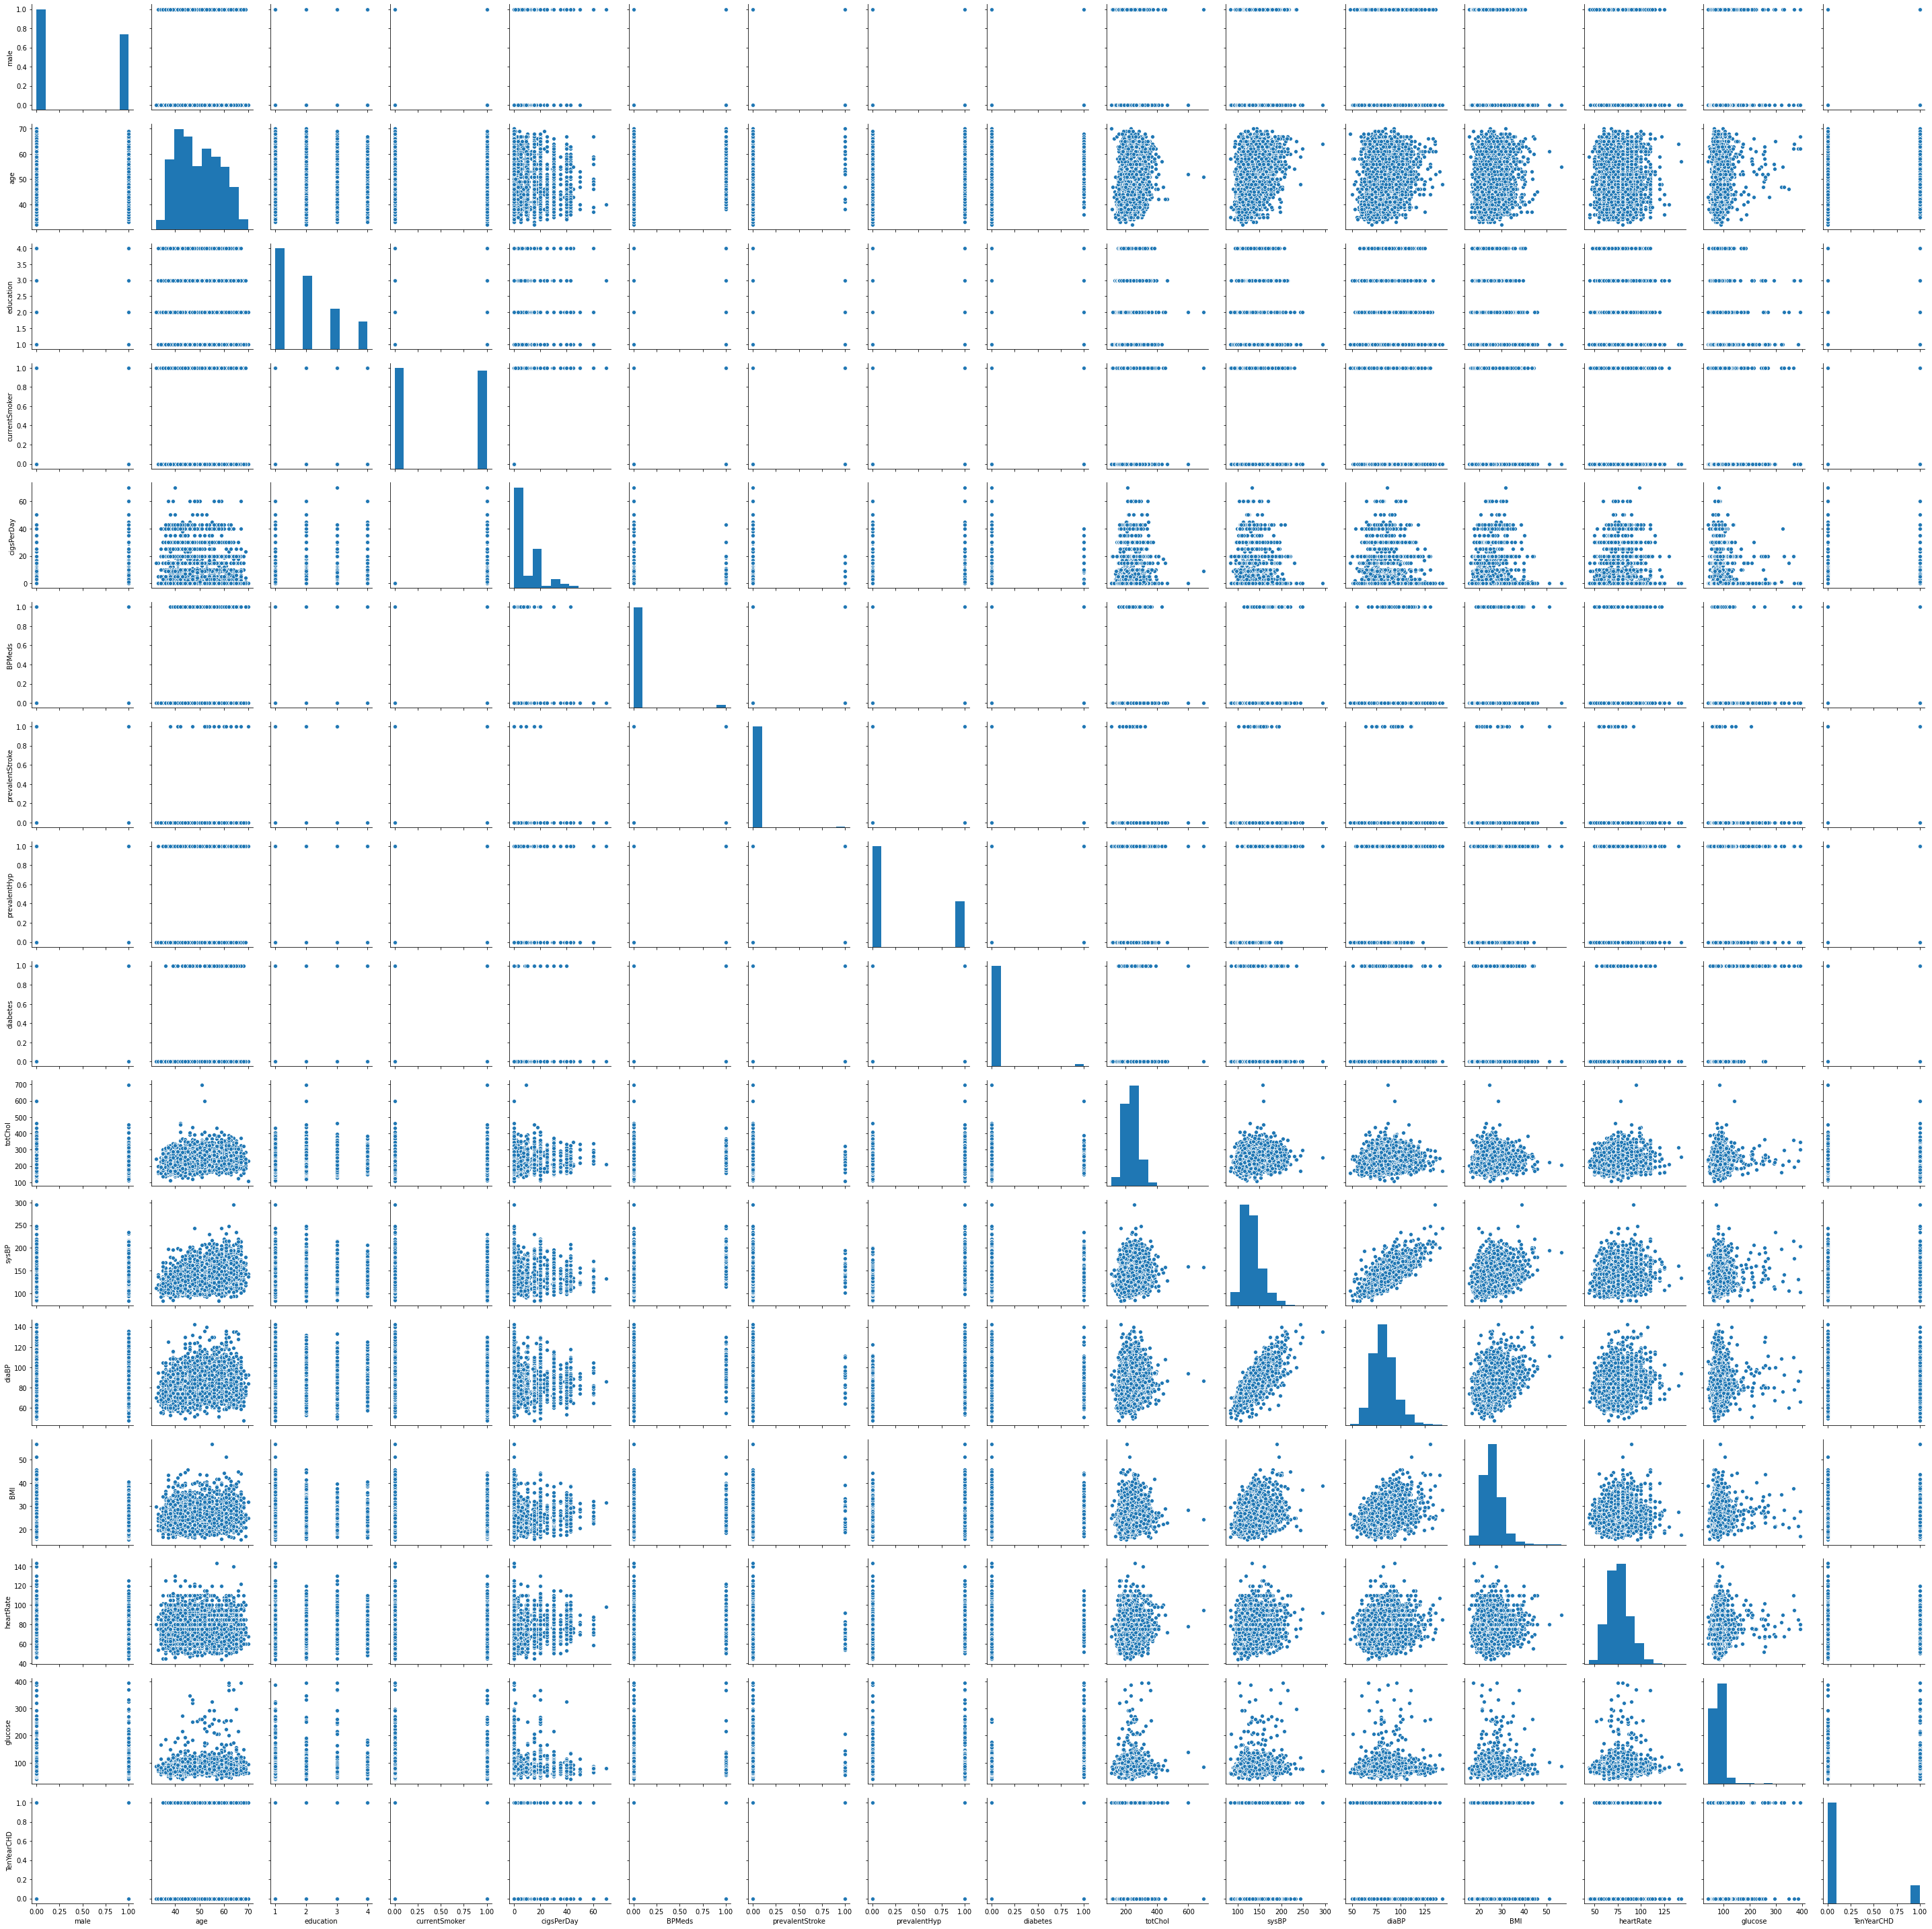

In [33]:
#Pair Plot
sns.pairplot(data=heart)
#sns.pairplot(data=heart, hue="TenYearCHD")

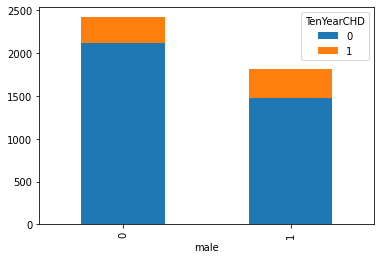

In [34]:
#Crosstab of male and female with 0 as female and 1 as male.
pd.crosstab(heart['male'],heart['TenYearCHD']).plot.bar(stacked=True)

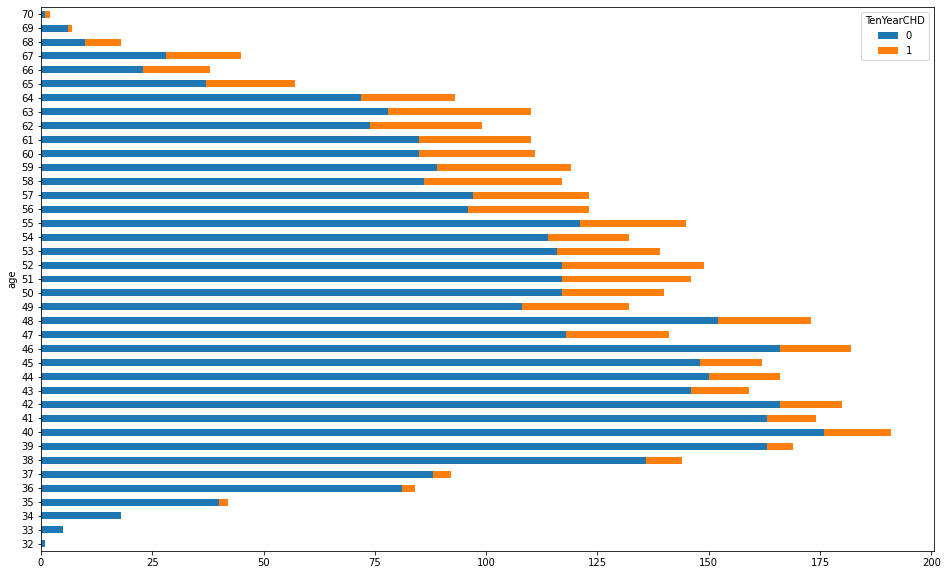

In [35]:
#Plotting horizontal cross tab plot age with TenYearCHD
pd.crosstab(heart['age'],heart['TenYearCHD']).plot.barh(figsize=(16,10),stacked=True)

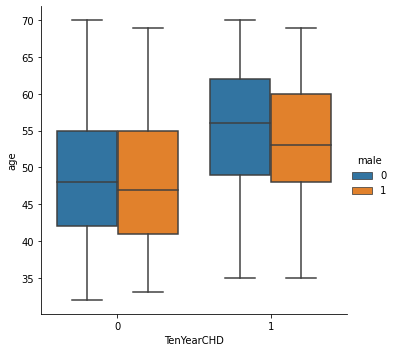

In [36]:
#PLotting with x axis as TenYearCHD and y axis as age with hue  as male(1 means male and 0 means female)
sns.catplot(x='TenYearCHD',y='age',hue='male',kind='box',data=heart)

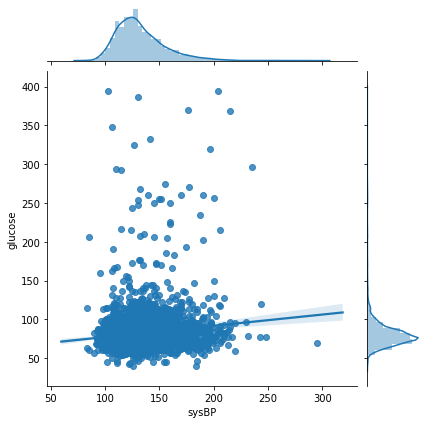

In [37]:
#joint plot with x-axis as syBP and y axis as glucose 
sns.jointplot(x="sysBP", y="glucose", data=heart, kind="reg")

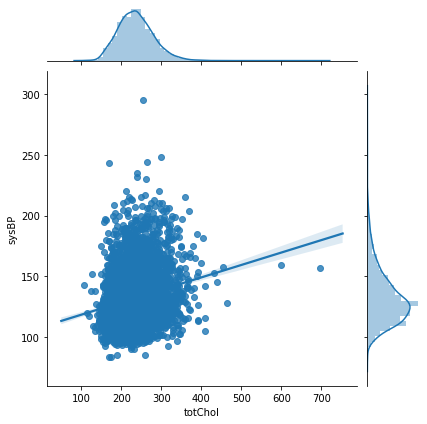

In [38]:
#joint plot with x-axis as totCHol and y axis as sysBP
sns.jointplot(x="totChol",y="sysBP", data=heart, kind="reg")

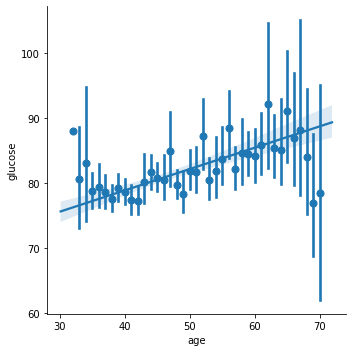

In [39]:
#lmplot to visualize a linear relationship as determined through regression.
sns.lmplot(x="age", y="glucose", data=heart, x_estimator=np.mean)

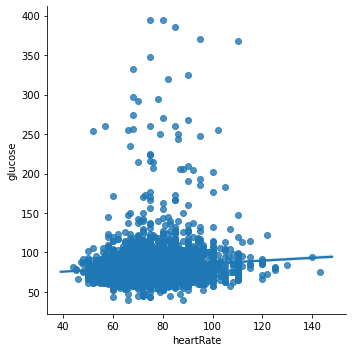

In [40]:
#lmplot with x-axis as heartRate and y-axis as glucose
sns.lmplot(x="heartRate",y="glucose", ci=75, data=heart)

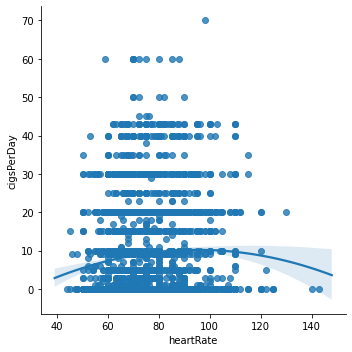

In [41]:
#lmplot to visualize a linear relationship as determined through regression with x as heartRate and y as cigsPerDay 
sns.lmplot(x="heartRate",y="cigsPerDay", data=heart, order=2)

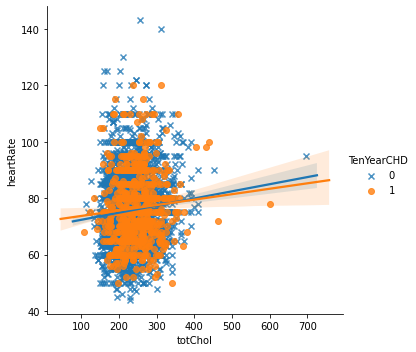

In [42]:
#lmplot with x as totChol and y as heartRate with hue as TenYearCHD
sns.lmplot(x="totChol",y="heartRate", hue="TenYearCHD", markers=["x","o"], data=heart)

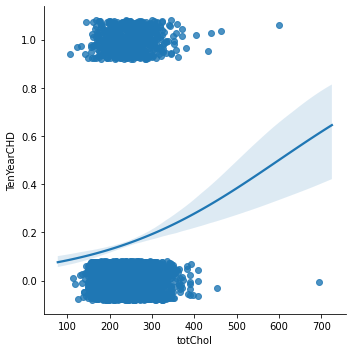

In [43]:
#Lm plot with x as totChol and y as TenYearCHD with logistic regression
sns.lmplot(x="totChol",y="TenYearCHD", data=heart, logistic=True, y_jitter=0.08)

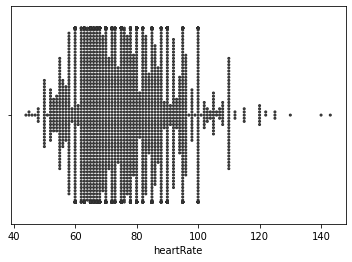

In [44]:
#swarm plot 
sns.swarmplot(x="heartRate", data=heart,size=2, color=".3", linewidth=1)

## Feature Selection

In [45]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent and  dependent variables
X = heart.iloc[:,0:15]  #independent columns or predictor variable
y = heart.iloc[:,-1]    #target column or response variable

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concatenating two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
10            sysBP  728.292522
14          glucose  382.459902
1               age  318.597444
9           totChol  231.502772
4        cigsPerDay  222.838359
11            diaBP  153.090954
7      prevalentHyp   92.167857
8          diabetes   39.103710
5            BPMeds   30.060641
0              male   18.915212
6   prevalentStroke   16.095638


In [46]:
#feature scores with sort in descending order
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,728.292522
14,glucose,382.459902
1,age,318.597444
9,totChol,231.502772
4,cigsPerDay,222.838359
11,diaBP,153.090954
7,prevalentHyp,92.167857
8,diabetes,39.103710
5,BPMeds,30.060641
0,male,18.915212


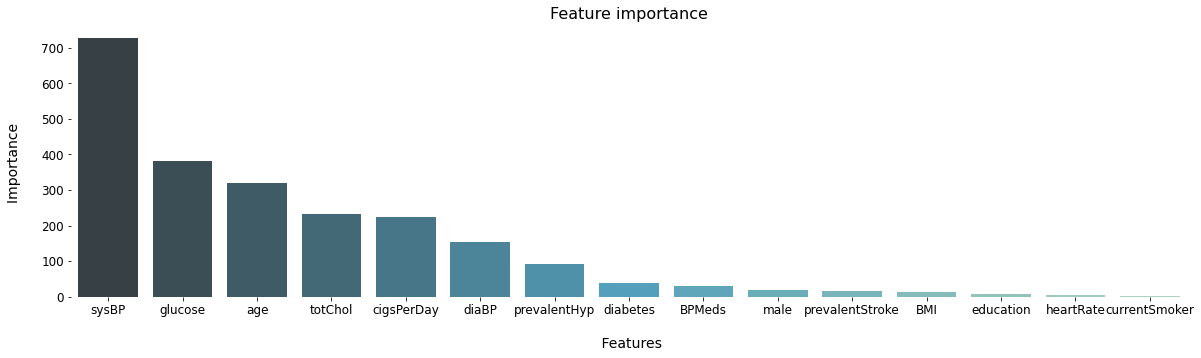

In [47]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [48]:
#We are dropping the education,currentSmoker,heartRate and BMI,prevalentStroke column 
#The above features are not as important features compared to others while determining TenYearCHD.
#Current Smoker may not be Smoker in the past years
#Education is a very subjective and it is not handy to put in practice

##### Performing Statistical Logit Model

In [49]:
#importing necessary libraries
import statsmodels.api as sm
y=heart.TenYearCHD
X=heart.drop(['TenYearCHD'],axis=1)

In [50]:
#Performing Statistical Logit Model on all the features and study the statistics
Xc=sm.add_constant(X)
model=sm.Logit(y,Xc)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378972
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4222
Method:                           MLE   Df Model:                           15
Date:                Mon, 06 Apr 2020   Pseudo R-squ.:                  0.1106
Time:                        15:46:47   Log-Likelihood:                -1606.1
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 9.338e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9695      0.659    -12.098      0.000      -9.261      -6.678
male                0.5092      0.100      5.074      0.000       0.313       0.706
age                 0.0619      0.006      9.962      0.000       0.050       0.074
education          -0.0154      0.046     -0.338      0.735      -0.105       0.074
currentSmoker       0.0132      0.144      0.092      0.927      -0.268       0.295
cigsPerDay          0.0209      0.006      3.684      0.000       0.010       0.032
BPMeds              0.2308      0.219      1.053      0.292      -0.199       0.660
prevalentStroke     0.9705      0.441      2.199      0.028       0.106       1.835
prevalentHyp        0.2350      0.128      1.831      0.067      -0.017       0.487
diabetes            0.3056      0.281      1.086      0.277      -0.246       0.857
totChol             0.0017      0.001      1.704      0.088      -0.000       0.004
sysBP               0.0142      0.004      4.011      0.000       0.007       0.021
diaBP              -0.0028      0.006     -0.473      0.636      -0.015       0.009
BMI                 0.0018      0.012      0.156      0.876      -0.021       0.025
heartRate          -0.0014      0.004     -0.355      0.723      -0.009       0.006
glucose             0.0055      0.002      2.793      0.005       0.002       0.009
===================================================================================
"""

## Spliting into training and testing data set

In [51]:
# Declare x,y and split using X_train and y_train
# Selecting the most important 10 features as X and dropping the other features
X= heart.drop(['TenYearCHD','education','heartRate','prevalentStroke','BMI','currentSmoker'],axis='columns')
y= heart.TenYearCHD

In [52]:
# Importing train_test_split from sklearn to split the dataset into training and testing dataset randomly
from sklearn.model_selection import train_test_split
#Spliting into training and testing dataset with testing dataset size as 20% and training as 80%
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3390, 10)
(3390,)
(848, 10)
(848,)


##### Our training dataset constists of  3390 rows and 10 most important and relevant features while our testing dataset constists 848 rows with the imost important features

# Modeling and Evaluation

##### Comparing different classifiers

In [53]:
#importing necessary package
from sklearn.model_selection import train_test_split,KFold,cross_val_score
#sklearn package for Logistic Regression
from sklearn.linear_model import LogisticRegression
#sklearn package for KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#sklearn package for RandomForest
from sklearn.ensemble import RandomForestClassifier

In [54]:
#We want to evaluate our model with Logistic,KNeighbors and Random Forest
models=[]
models.append(('LR',LogisticRegression()))
models.append(('KN',KNeighborsClassifier()))
models.append(('RF',RandomForestClassifier()))

In [55]:
#Here we are evaluating our model in our training dataset before evaluating our model to testing dataset
#We  have splitted into 10 parts 
results=[]
names=[]
scoring='accuracy'
for name,model in models:
    kfold=KFold(n_splits=10,random_state=7)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg=("%s: %f (%f)" % (name,cv_result.mean(),cv_result.std()))
    print(msg)

LR: 0.851032 (0.008052)
KN: 0.830383 (0.012109)
RF: 0.838643 (0.016213)


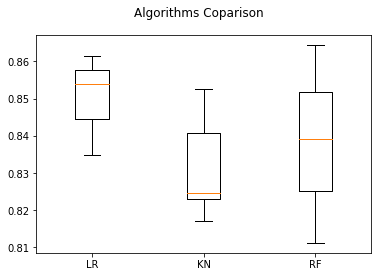

In [56]:
#The performance of our model on the training dataset with KFolds before evaluating our data to testing dataset(new data set)
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle('Algorithms Coparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
#import necessary libraries for f1score,accuracy score and recall and precision
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report

The accuracy score for Logistic Regression is: 85.84905660377359%
The f1 score for Logistic Regression is: 9.09090909090909%
The precision score for Logistic Regression is: 75.0%
The recall score for Logistic Regression is: 4.838709677419355%
roc_accuracy score 0.717162716093388
confusion_matrix 
 [[722   2]
 [118   6]]


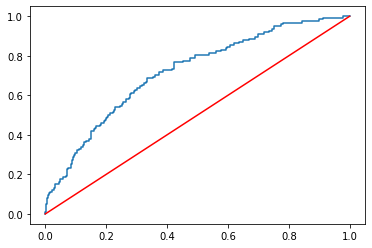

In [58]:
#Logistic Regression
LR=LogisticRegression()
LR.fit(X_train,y_train)
Y_pred=LR.predict(X_test)


y_test_prob = LR.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, Y_pred)
print(f"The accuracy score for Logistic Regression is: {acc*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, Y_pred)
print(f"The f1 score for Logistic Regression is: {f1*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, Y_pred)
print(f"The precision score for Logistic Regression is: {precision*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, Y_pred)
print(f"The recall score for Logistic Regression is: {recall*100}%")
print("roc_accuracy score",roc_auc_score(y_test,y_test_prob)) 

print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))# Validating the data on the trained data set-->Train and Predicted


fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)  # Test and Probability-- Plotting
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, "r-")
plt.show()

The accuracy score for KNC is: 82.66509433962264%
The f1 score for KNC is: 13.017751479289942%
The precision score for KNC is: 24.444444444444443%
The recall score for KNC is: 8.870967741935484%
roc_accuracy score 0.5838252985207628
confusion_matrix 
 [[690  34]
 [113  11]]


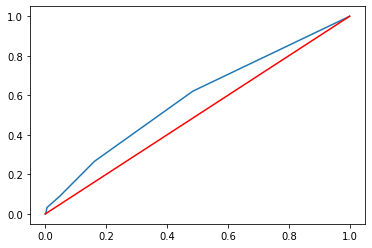

In [59]:
#K Neighbors Model
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
Y_pred=KNN.predict(X_test)

y_test_prob = KNN.predict_proba(X_test)[:,1]

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, Y_pred)
print(f"The accuracy score for KNC is: {acc*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, Y_pred)
print(f"The f1 score for KNC is: {f1*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, Y_pred)
print(f"The precision score for KNC is: {precision*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, Y_pred)
print(f"The recall score for KNC is: {recall*100}%")
#Roc score is better when it approaches 1
print("roc_accuracy score",roc_auc_score(y_test,y_test_prob)) 
print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)  # Test and Probability-- Plotting
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, "r-")
plt.show()

The accuracy score for RFC is: 83.9622641509434%
The f1 score for RFC is: 11.688311688311689%
The precision score for RFC is: 30.0%
The recall score for RFC is: 7.258064516129033%
roc_accuracy acore 0.6292884512564605
confusion_matrix 
 [[703  21]
 [115   9]]


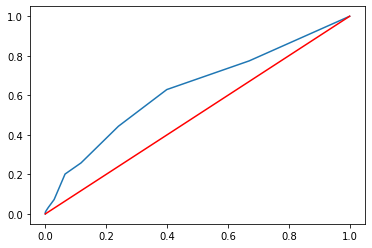

In [60]:
#RandomForest 
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
Y_pred=RFC.predict(X_test)

y_test_prob = RFC.predict_proba(X_test)[:,1]

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, Y_pred)
print(f"The accuracy score for RFC is: {acc*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, Y_pred)
print(f"The f1 score for RFC is: {f1*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, Y_pred)
print(f"The precision score for RFC is: {precision*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, Y_pred)
print(f"The recall score for RFC is: {recall*100}%")


#Roc score is better when it approaches 1
print("roc_accuracy acore",roc_auc_score(y_test,y_test_prob)) 

print("confusion_matrix \n",confusion_matrix(y_test,Y_pred))

#ROC curve...ROC is good if it approaches 1
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)  # Test and Probability-- Plotting
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, "r-")
plt.show()

### For the given dataset , the Logistic Regression performs better than Kth Nearest Classifier and Random Forest Classifier